In [1]:
from PIL import Image
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
from glob import glob


In [2]:
pwd

'/mnt/nas100_vol2/LeeJungHoon/AOV_task(binary_clssification)/curation'

In [4]:
external_abnormal_path = '/mnt/nas100_vol2/LeeJungHoon/bon_patients_image/Abnormal_image_v2_ex_in/*.jpg'
exteranl_abnormal = glob(external_abnormal_path)
print(len(exteranl_abnormal))

520


In [5]:
exteranl_abnormal[0]

'/mnt/nas100_vol2/LeeJungHoon/bon_patients_image/Abnormal_image_v2_ex_in/21066285 박한창 2018-07-19 (외부자료-저장) 내시경 205d.jpg'

## normal(Negative) 이름 수정해서 파일 저장
- 파일 이름 : 환자번호_날짜_정보

In [6]:
import re

path_0 = '24523268 김민선 2018-06-28 (외부자료-저장) 내시경05d'
a= path_0.split('/')[-1]
b= a.split('(')[-1]
e= a.split('(')[0]
print(b)
print(e)
c = re.findall('05d+', b)
d = re.findall('205d+', b)

korean = re.compile('[\u3131-\u3163\uac00-\ud7a3]+')
name_first = a.split('(')[0]
#한글을 뛰어쓰기로 변환하고, 뛰어쓰기를 다시 _로 변환
name_first= re.sub(korean, '', name_first).replace(' ', '_')
print(name_first)
name_last = c[0]
if len(c) <len(d):
    name_last=d[0]
    
print(name_first+name_last)

외부자료-저장) 내시경05d
24523268 김민선 2018-06-28 
24523268__2018-06-28_
24523268__2018-06-28_05d


In [7]:
pull_name=exteranl_abnormal[0]
a= pull_name.split('/')[-1]
b= a.split('(')[-1]

c = re.findall('05d+', b)
d = re.findall('205d+', b)
print(c[0])
name_first = a.split('(')[0]
#한글과 영어이름을 뛰어쓰기로 변환하고, 뛰어쓰기를 다시 _로 변환
korean = re.compile('[\u3131-\u3163\uac00-\ud7a3]+')
name_first= re.sub(korean, '', name_first)
name_first = re.sub('[a-zA-z]','',name_first).replace(' ', '_')
name_last = c[0]
if len(c) <len(d):
    name_last=d[0]
    
print(name_first+name_last)

05d
21066285__2018-07-19_05d


## abnormal(Negative) 이름 수정해서 파일 저장
## Image resize 
- 파일 이름 : 환자번호_날짜_정보

In [8]:
#external_abnormal(positive)
import shutil 

len_external_abnormal = len(exteranl_abnormal)



bin_external_abormal_matrix = []

for i in range(len_external_abnormal):
    
    c_abnormal = None
    d_abnormal = None
    e_abnormal = None
    f_abnormal = None
    
    file = exteranl_abnormal[i]
    
    #print(file)
    a_abnormal = file.split('/')[-1]
    b_abnormal = a_abnormal.split('(')[-1]

    c_abnormal = re.findall('05d+', b_abnormal)
    d_abnormal = re.findall('205d+', b_abnormal)
    e_abnormal = re.findall('305d+', b_abnormal)
    f_abnormal = re.findall('405d+', b_abnormal)
    g_abnormal = re.findall('505d+', b_abnormal)
    h_abnormal = re.findall('605d+', b_abnormal)
    j_abnormal = re.findall('705d+', b_abnormal)
    k_abnormal = re.findall('805d+', b_abnormal)
    l_abnormal = re.findall('905d+', b_abnormal)
    
#     print(c)
#     print(d)

    name_first = a_abnormal.split('(')[0]
#한글과 영어이름을 띄어쓰기로 변환하고, 띄어쓰기를 다시 _로 변환
    korean = re.compile('[\u3131-\u3163\uac00-\ud7a3]+')
    name_first= re.sub(korean, '', name_first)
    name_first = re.sub('[a-zA-z]','',name_first).replace(' ', '_')
    name_first = re.sub(",", "", name_first)
    
# 마지막 글자가 다르거나 없는 경우가 존재하기 때문에 elif사용.    
    if d_abnormal:
        name_last=d_abnormal[0]
#         print(name_last)
        
    elif e_abnormal:
        name_last=e_abnormal[0]
        
    elif f_abnormal:
        name_last=f_abnormal[0]
        
    elif g_abnormal:
        name_last=g_abnormal[0]
    
    elif h_abnormal:
        name_last=h_abnormal[0]
    
    elif j_abnormal:
        name_last=j_abnormal[0]
    
    elif k_abnormal:
        name_last=k_abnormal[0]
        
    elif l_abnormal:
        name_last=l_abnormal[0]
        
    else:
        name_last=c_abnormal[0]
        

    external_abnormal_file_name = name_first + name_last+ '.jpg' 
    shutil.copy2(file,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_v4/%s' % external_abnormal_file_name)

    print(external_abnormal_file_name)
    bin_external_abormal_matrix.append(external_abnormal_file_name)
    



21066285__2018-07-19_205d.jpg
21066285__2018-07-19_305d.jpg
21066285__2018-07-19_405d.jpg
21066285__2018-07-19_505d.jpg
21066285__2018-07-19_05d.jpg
24523268__2018-06-28_205d.jpg
24523268__2018-06-28_305d.jpg
24523268__2018-06-28_05d.jpg
28196978__2014-09-01_205d.jpg
28196978__2014-09-01_305d.jpg
28196978__2014-09-01_405d.jpg
28196978__2014-09-01_505d.jpg
28196978__2014-09-01_05d.jpg
28506474__2017-05-04_205d.jpg
28506474__2017-05-04_305d.jpg
28506474__2017-05-04_05d.jpg
29656721__2016-04-06_205d.jpg
29656721__2016-04-06_305d.jpg
29656721__2016-04-06_05d.jpg
29985056__2020-10-28_205d.jpg
29985056__2020-10-28_305d.jpg
29985056__2020-10-28_05d.jpg
31946326__2020-02-05_205d.jpg
31946326__2020-02-05_05d.jpg
32071085__2019-10-10_05d.jpg
33764481__2018-07-12_205d.jpg
33764481__2018-07-12_05d.jpg
34068984__2015-12-22_05d.jpg
35251842__2017-12-27_205d.jpg
35251842__2017-12-27_305d.jpg
35251842__2017-12-27_05d.jpg
37618799__2019-02-07_205d.jpg
37618799__2019-02-07_05d.jpg
46429582__2013-09-26_0

In [19]:
#abnormal resize
from PIL import Image
import cv2

negative_path = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_v4/*.jpg' 
negative = glob(negative_path)
path_negative = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_crop_v4'


print(len(negative))


518


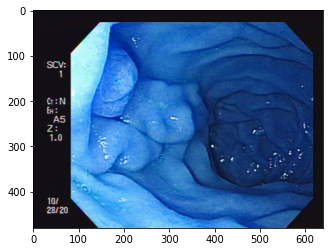

In [25]:
sample = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_v4/29985056__2020-10-28_205d.jpg' 

image = cv2.imread(sample)
image_gray_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(image)

In [18]:
#try 사용
'''#normal resize
from PIL import Image
import cv2

negative_path = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_v4/*.jpg' 
negative = glob(negative_path)
path_negative = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_crop_v4'

err_list = []
for i in range(len(negative)):
    try:
        i = negative[i]
        image_name = i.split('/')[-1].split('.')[0]
        print(image_name)
        img = cv2.imread(i)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #들어오는 이미지의 컬러 형태가 BGR인지 RGB인지 모르기 때문에 변형



        image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_array = np.array(image_gray, dtype=np.uint8)
        edge = cv2.Canny(img_array,50,200)

        #vertical crop index
        len_width = len(edge[144,:])
        #vertical 방향으로 idx 확인
        img_index_left = []
        img_index_right = []

        for i in range(len_width):
            vertical_sum_left = np.sum(edge[:,i]/255)
            if vertical_sum_left > 110:
                img_index_left.append(i)

            vertical_sum_right = np.sum(edge[:,-(i+1)]/255)
            if vertical_sum_right > 100:
                real_right_idx = len_width - (i+1) 
                img_index_right.append(real_right_idx) 

        index_left = img_index_left[0]
        index_right = img_index_right[0]

        #horizontal crop index
        len_height = len(edge[:,144])
        #horizontal 방향으로 idx 확인
        img_index_up = []
        img_index_down = []
        for i in range(len_height):
            horizontal_sum_up = np.sum(edge[i,:]/255)
            if horizontal_sum_up > 110:
                img_index_up.append(i)

            horizontal_sum_down = np.sum(edge[-(i+1),:]/255)
            horizontal_sum_end = np.sum(edge[-1,:]/255)

            if horizontal_sum_down > 100:
                if horizontal_sum_end != 0:
                    real_down_idx = 479
                    img_index_down.append(real_down_idx)    
                else:
                    real_down_idx = len_height - (i+1) 
                    img_index_down.append(real_down_idx)     

        img_up = img_index_up[0]
        print(img_up)
        img_down = img_index_down[0]
        print(img_index_down)
        print(img_down)

        img = img[img_up:img_down, index_left:index_right]

        print(img.shape)
        # print(np.max(img))

        # img = np.array(img, dtype = np.float32)
        # img = (img - np.min(img))/(np.max(img)-np.min(img))

        cv2.imwrite(path_negative+ '/'+image_name+'.jpg', img)
        # plt.imshow(img)
    except:
        i = negative[i]
        image_name = i.split('/')[-1].split('.')[0]
        err_list.append(image_name)
        '''

21066285__2018-07-19_205d
37
[443, 315, 311, 301, 299, 297, 295, 37]
443
(406, 472, 3)
21066285__2018-07-19_305d
37
[443, 431, 37]
443
(406, 472, 3)
21066285__2018-07-19_405d
37
[443, 37]
443
(406, 472, 3)
21066285__2018-07-19_505d
37
[443, 431, 301, 299, 297, 295, 293, 37]
443
(406, 472, 3)
21066285__2018-07-19_05d
37
[443, 433, 431, 325, 301, 299, 295, 283, 185, 159, 153, 37]
443
(406, 471, 3)
24523268__2018-06-28_205d
33
[441, 429, 427, 407, 405, 393, 391, 377, 371, 369, 357, 355, 347, 335, 333, 323, 321, 319, 313, 311, 307, 305, 303, 299, 297, 293, 289, 285, 283, 275, 271, 263, 261, 249, 247, 239, 235, 233, 227, 225, 223, 221, 217, 215, 213, 211, 209, 207, 205, 203, 201, 199, 197, 196, 195, 193, 191, 189, 185, 183, 182, 181, 180, 179, 177, 175, 173, 171, 170, 169, 167, 165, 163, 162, 161, 160, 159, 157, 155, 154, 153, 151, 149, 147, 145, 141, 139, 137, 135, 134, 133, 131, 127, 125, 121, 119, 117, 113, 109, 105, 103, 99, 97, 95, 93, 91, 89, 87, 83, 81, 77, 73, 69, 67, 61, 59, 55, 53

error: OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [50]:
#abnormal resize
from PIL import Image
import cv2

negative_path = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_v4/*.jpg' 
negative = glob(negative_path)
path_negative = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Negative_crop_v4_'

err_list = []
for i in range(len(negative)):
    i = negative[i]
    image_name = i.split('/')[-1].split('.')[0]
    print(image_name)
    img = cv2.imread(i)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #들어오는 이미지의 컬러 형태가 BGR인지 RGB인지 모르기 때문에 변형



    image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_array = np.array(image_gray, dtype=np.uint8)
    edge = cv2.Canny(img_array,10,70)

    #vertical crop index
    len_width = len(edge[144,:])
    #vertical 방향으로 idx 확인
    img_index_left = []
    img_index_right = []

    for i in range(len_width):
        vertical_sum_left = np.sum(edge[:,i]/255)
        if vertical_sum_left > 140:
            img_index_left.append(i)

        vertical_sum_right = np.sum(edge[:,-(i+1)]/255)
        vertical_sum_end = np.sum(edge[:,-1]/255)
    
        if vertical_sum_end != 0:
            real_right_idx = 479
            img_index_right.append(real_right_idx)
        
        elif vertical_sum_right > 5:
            real_right_idx = len_width - (i+1) 
            img_index_right.append(real_right_idx)


    index_left = img_index_left[0]
    index_right = img_index_right[0]

    #horizontal crop index
    len_height = len(edge[:,144])
    #horizontal 방향으로 idx 확인
    img_index_up = []
    img_index_down = []
    for i in range(len_height):
        
        horizontal_sum_up = np.sum(edge[i,:]/255)
        horizontal_sum_start = np.sum(edge[0,:]/255)
        if horizontal_sum_start != 0:
            real_up_idx = 0
            img_index_up.append(i)
        elif horizontal_sum_up > 110:
            img_index_up.append(i)

        horizontal_sum_down = np.sum(edge[-(i+1),:]/255)
        horizontal_sum_end = np.sum(edge[-1,:]/255)
        

        if horizontal_sum_end != 0:
            real_down_idx = 639
            img_index_down.append(real_down_idx)
        elif horizontal_sum_down > 170:
            real_down_idx = len_height - (i+1) 
            img_index_down.append(real_down_idx)
       

    img_up = img_index_up[0]
    print(img_up)
    img_down = img_index_down[0]
    # print(img_index_down)
    print(img_down)

    img = img[img_up:img_down, index_left:index_right]

    print(img.shape)
    # print(np.max(img))

    # img = np.array(img, dtype = np.float32)
    # img = (img - np.min(img))/(np.max(img)-np.min(img))

    cv2.imwrite(path_negative+ '/'+image_name+'.jpg', img)
    # plt.imshow(img)
    # except:
    #     i = negative[i]
    #     image_name = i.split('/')[-1].split('.')[0]
    #     err_list.append(image_name)

21066285__2018-07-19_205d
37
443
(406, 472, 3)
21066285__2018-07-19_305d
37
443
(406, 472, 3)
21066285__2018-07-19_405d
37
443
(406, 472, 3)
21066285__2018-07-19_505d
37
443
(406, 472, 3)
21066285__2018-07-19_05d
37
443
(406, 472, 3)
24523268__2018-06-28_205d
33
441
(408, 471, 3)
24523268__2018-06-28_305d
33
441
(408, 471, 3)
24523268__2018-06-28_05d
33
441
(408, 473, 3)
28196978__2014-09-01_205d
33
442
(409, 476, 3)
28196978__2014-09-01_305d
33
442
(409, 474, 3)
28196978__2014-09-01_405d
33
442
(409, 471, 3)
28196978__2014-09-01_505d
33
442
(409, 471, 3)
28196978__2014-09-01_05d
34
442
(408, 471, 3)
28506474__2017-05-04_205d
35
443
(408, 471, 3)
28506474__2017-05-04_305d
36
443
(407, 471, 3)
28506474__2017-05-04_05d
35
444
(409, 471, 3)
29656721__2016-04-06_205d
38
445
(407, 460, 3)
29656721__2016-04-06_305d
38
445
(407, 460, 3)
29656721__2016-04-06_05d
38
445
(407, 460, 3)
29985056__2020-10-28_205d
26
639
(454, 535, 3)
29985056__2020-10-28_305d
26
639
(454, 535, 3)
29985056__2020-10-

In [10]:
len(set(bin_matrix))

590

## normal(Negative) 이름 수정해서 파일 저장
- image resize 진행

In [44]:
normal_path = '/mnt/nas100_vol2/LeeJungHoon/bon_patients_image/Normal_image_v1/*.jpg'
normal = glob(normal_path)
print(len(normal))

590


In [45]:
normal[0]

'/mnt/nas100_vol2/LeeJungHoon/bon_patients_image/Normal_image_v1/10522963 김정환 2018-12-27 식도위십이지장경검사 (비진정)05d.jpg'

In [46]:
#external_abnormal(positive)
import shutil 

len_normal = len(normal)



bin_ex_in_normal_matrix = []

for i in range(len_normal):
    
    c_abnormal = None
    d_abnormal = None
    e_abnormal = None
    f_abnormal = None
    
    file = normal[i]
    
    #print(file)
    a_abnormal = file.split('/')[-1]
    b_abnormal = a_abnormal.split('(')[-1]

    c_abnormal = re.findall('05d+', b_abnormal)
    d_abnormal = re.findall('205d+', b_abnormal)
    e_abnormal = re.findall('305d+', b_abnormal)
    f_abnormal = re.findall('405d+', b_abnormal)
    g_abnormal = re.findall('505d+', b_abnormal)
    h_abnormal = re.findall('605d+', b_abnormal)
    j_abnormal = re.findall('705d+', b_abnormal)
    k_abnormal = re.findall('805d+', b_abnormal)
    l_abnormal = re.findall('905d+', b_abnormal)
    
#     print(c)
#     print(d)

    name_first = a_abnormal.split('(')[0]
#한글과 영어이름을 띄어쓰기로 변환하고, 띄어쓰기를 다시 _로 변환
    korean = re.compile('[\u3131-\u3163\uac00-\ud7a3]+')
    name_first= re.sub(korean, '', name_first)
    name_first = re.sub('[a-zA-z]','',name_first).replace(' ', '_')
    name_first = re.sub(",", "", name_first)
    
# 마지막 글자가 다르거나 없는 경우가 존재하기 때문에 elif사용.    
    if d_abnormal:
        name_last=d_abnormal[0]
#         print(name_last)
        
    elif e_abnormal:
        name_last=e_abnormal[0]
        
    elif f_abnormal:
        name_last=f_abnormal[0]
        
    elif g_abnormal:
        name_last=g_abnormal[0]
    
    elif h_abnormal:
        name_last=h_abnormal[0]
    
    elif j_abnormal:
        name_last=j_abnormal[0]
    
    elif k_abnormal:
        name_last=k_abnormal[0]
        
    elif l_abnormal:
        name_last=l_abnormal[0]
        
    else:
        name_last=c_abnormal[0]
        

    normal_file_name = name_first + name_last+ '.jpg' 
    shutil.copy2(file,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Positive_v4/%s' % normal_file_name)

    print(normal_file_name)
    bin_ex_in_normal_matrix.append(normal_file_name)
    



10522963__2018-12-27__05d.jpg
10524154__2020-03-09__205d.jpg
10524154__2020-03-09__305d.jpg
10524154__2020-03-09__05d.jpg
10527052__2018-03-17__05d.jpg
10527052__2019-02-16__05d.jpg
10527052__2021-09-25__05d.jpg
10536188__2019-05-27__05d.jpg
10536188__2021-02-24__205d.jpg
10536188__2021-02-24__05d.jpg
10567252__2020-01-06__05d.jpg
10586501__2019-04-08__205d.jpg
10586501__2021-07-21__05d.jpg
10605527__2022-04-28__05d.jpg
10626726__2020-12-17__05d.jpg
10626726__2022-01-04__205d.jpg
10626726__2022-01-04__05d.jpg
10639272__2021-06-22__205d.jpg
10639272__2021-06-22__05d.jpg
10684900__2022-04-28__05d.jpg
10719510__2022-04-27__05d.jpg
10747445__2022-04-18__205d.jpg
10747445__2022-04-18__05d.jpg
10781135__2020-02-26__05d.jpg
10794302__2020-06-11__205d.jpg
10794302__2020-06-11__05d.jpg
10794302__2021-06-04__05d.jpg
10801899__2018-12-01__05d.jpg
10822531__2020-01-06__05d.jpg
10822531__2021-01-09__05d.jpg
10822531__2022-01-08__05d.jpg
10836307__2019-12-16__05d.jpg
10836307__2020-12-02__05d.jpg
10

In [47]:
#normal resize
from PIL import Image
import cv2

Positive_path = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Positive_v4/*.jpg' 
Positive = glob(Positive_path)
path_Positive = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/cropped_data/cropped_data_v4_ex_in/Positive_crop_v4'


print(len(Positive))


590


In [49]:
err_list = []
for i in range(len(Positive)):
    i = Positive[i]
    image_name = i.split('/')[-1].split('.')[0]
    print(image_name)
    img = cv2.imread(i)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #들어오는 이미지의 컬러 형태가 BGR인지 RGB인지 모르기 때문에 변형



    image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_array = np.array(image_gray, dtype=np.uint8)
    edge = cv2.Canny(img_array,10,70)

    #vertical crop index
    len_width = len(edge[144,:])
    #vertical 방향으로 idx 확인
    img_index_left = []
    img_index_right = []

    for i in range(len_width):
        vertical_sum_left = np.sum(edge[:,i]/255)
        if vertical_sum_left > 140:
            img_index_left.append(i)

        vertical_sum_right = np.sum(edge[:,-(i+1)]/255)
        vertical_sum_end = np.sum(edge[:,-1]/255)
    
        if vertical_sum_end != 0:
            real_right_idx = 479
            img_index_right.append(real_right_idx)
        
        elif vertical_sum_right > 5:
            real_right_idx = len_width - (i+1) 
            img_index_right.append(real_right_idx)


    index_left = img_index_left[0]
    index_right = img_index_right[0]

    #horizontal crop index
    len_height = len(edge[:,144])
    #horizontal 방향으로 idx 확인
    img_index_up = []
    img_index_down = []
    for i in range(len_height):
        
        horizontal_sum_up = np.sum(edge[i,:]/255)
        horizontal_sum_start = np.sum(edge[0,:]/255)
        if horizontal_sum_start != 0:
            real_up_idx = 0
            img_index_up.append(i)
        elif horizontal_sum_up > 110:
            img_index_up.append(i)

        horizontal_sum_down = np.sum(edge[-(i+1),:]/255)
        horizontal_sum_end = np.sum(edge[-1,:]/255)
        

        if horizontal_sum_end != 0:
            real_down_idx = 639
            img_index_down.append(real_down_idx)
        elif horizontal_sum_down > 170:
            real_down_idx = len_height - (i+1) 
            img_index_down.append(real_down_idx)
       

    img_up = img_index_up[0]
    print(img_up)
    img_down = img_index_down[0]
    # print(img_index_down)
    print(img_down)

    img = img[img_up:img_down, index_left:index_right]

    print(img.shape)
    # print(np.max(img))

    # img = np.array(img, dtype = np.float32)
    # img = (img - np.min(img))/(np.max(img)-np.min(img))

    cv2.imwrite(path_Positive+ '/'+image_name+'.jpg', img)
    # plt.imshow(img)
    # except:
    #     i = negative[i]
    #     image_name = i.split('/')[-1].split('.')[0]
    #     err_list.append(image_name)

10522963__2018-12-27__05d
33
441
(408, 466, 3)
10524154__2020-03-09__205d
33
441
(408, 463, 3)
10524154__2020-03-09__305d
33
441
(408, 419, 3)
10524154__2020-03-09__05d
33
441
(408, 415, 3)
10527052__2018-03-17__05d
33
441
(408, 466, 3)
10527052__2019-02-16__05d
33
441
(408, 466, 3)
10527052__2021-09-25__05d
33
441
(408, 429, 3)
10536188__2019-05-27__05d
33
441
(408, 465, 3)
10536188__2021-02-24__205d
33
441
(408, 428, 3)
10536188__2021-02-24__05d
33
441
(408, 462, 3)
10567252__2020-01-06__05d
33
441
(408, 461, 3)
10586501__2019-04-08__205d
33
441
(408, 466, 3)
10586501__2021-07-21__05d
33
441
(408, 461, 3)
10605527__2022-04-28__05d
33
441
(408, 462, 3)
10626726__2020-12-17__05d
33
441
(408, 461, 3)
10626726__2022-01-04__205d
33
441
(408, 461, 3)
10626726__2022-01-04__05d
33
441
(408, 461, 3)
10639272__2021-06-22__205d
33
441
(408, 465, 3)
10639272__2021-06-22__05d
33
441
(408, 421, 3)
10684900__2022-04-28__05d
33
441
(408, 463, 3)
10719510__2022-04-27__05d
33
441
(408, 462, 3)
1074744

### abnormal data 누락된 파일 제거한 list 생성

In [ ]:
# positive(abnormal)
img_no_csv_list = []
img_csv_list = []
for i in one_img_list:
#     print(i)
#     patient_num_img = abnormal_glob[i].split('/')[-1].split('_')[0]

    if i not in df_str_list:
        img_no_csv_list.append(i)
#         print('파일이 존재하지 않습니다:',i)
    else:
        img_csv_list.append(i)
#         print('파일이 존재:',i)

#     else:
#         print('있습니다!!')
        
print(len(img_no_csv_list))
print(len(img_csv_list))
img_no_csv_list
# print(len(img_csv_list))
# print(len(no_list))

4
63


['56141548', '56998629', '50462603', '57443920']

In [ ]:
# positive(abnormal)
csv_no_img_list = []
img_csv_list = []
for i in df_str_list:
#     print(i)
#     patient_num_img = abnormal_glob[i].split('/')[-1].split('_')[0]

    if i not in one_img_list:
        csv_no_img_list.append(i)
#         print('파일이 존재하지 않습니다:',i)
    else:
        img_csv_list.append(i)
#         print('파일이 존재:',i)

#     else:
#         print('있습니다!!')
        
print(len(csv_no_img_list))
print(len(img_csv_list))
csv_no_img_list
# print(len(img_csv_list))
# print(len(no_list))

2
67


['56426629', '61437986']

In [71]:
# abnormal(누락된 파일 제외한 리스트 생성)
ab_no_file = img_no_csv_list + csv_no_img_list
print(len(ab_no_file))


6


In [74]:
# normal 파일에서 누락된 이미지 제거 후 새로운 파일에 저장
b = []
c = []
for i in range(len(ex_abnormal_glob)):
    patient_num = ex_abnormal_glob[i].split('/')[-1].split('_')[0]
    name = ex_abnormal_glob[i].split('/')[-1]

    a = ex_abnormal_glob[i]
    
#     print(a)
    if patient_num not in ab_no_file:
            b.append(patient_num)
            shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/exist_abn_data_v4/%s' %name)
#     else:
#         c.append(patient_num)
        


In [51]:
'''<external_abnormal>
-image 존재, excel 존재 X
['56141548', '56998629', '50462603', '57443920']
3+3+2+5=13

-image 존재X, excel 존재
['56426629', '61437986']'''

"<external_abnormal>\n-image 존재, excel 존재 X\n['56141548', '56998629', '50462603', '57443920']\n3+3+2+5=13\n\n-image 존재X, excel 존재\n['56426629', '61437986']"

## 누락된 파일 제거하고 train/val/test split

In [54]:
exist_abn_path = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/exist_abn_data_v4/*.jpg'
exist_abn_data = glob(exist_abn_path)
print(len(exist_abn_data))
"""
현재 엑셀 파일에는 존재하지만 이미지가 존재하지 않는 환자의 수는 4명이지만 
4명의 총 이미지 파일 수는 13장이기 때문에 총 189장 중 174장만 존재
174+331
"""
exist_nor_path = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/exist_nor_data_v4/*.jpg'
exist_nor_data = glob(exist_nor_path)
print(len(exist_nor_data))

505
590


In [57]:
exist_nor_data[0]

'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/exist_nor_data_v4/10522963__2018-12-27__05d.jpg'

In [55]:
nor_pat_id = []
abn_pat_id = []

for i in range(len(exist_nor_data)):
    nor_pat_id.append(exist_nor_data[i].split('/')[-1].split('_')[0])
    

for j in range(len(exist_abn_data)):
    abn_pat_id.append(exist_abn_data[j].split('/')[-1].split('_')[0])
#이미지수 확인    
print(len(nor_pat_id),len(abn_pat_id)) 

590 505


In [58]:
#patients 수 확인
nor_pat_one_id = list(set(nor_pat_id))
abn_pat_one_id = list(set(abn_pat_id))

print(len(nor_pat_one_id),len(abn_pat_one_id))

365 185


In [59]:
#normal
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(nor_pat_one_id,test_size=0.3,random_state=42)
x_test, x_valid = train_test_split(x_test,test_size=0.5,random_state=42)

In [60]:
#abnormal
from sklearn.model_selection import train_test_split
x_ab_train, x_ab_test = train_test_split(abn_pat_one_id,test_size=0.3,random_state=42)
x_ab_test, x_ab_valid = train_test_split(x_ab_test,test_size=0.5,random_state=42)

In [61]:
print(len(x_train),len(x_test),len(x_valid))
print(len(x_ab_train),len(x_ab_test),len(x_ab_valid))

255 55 55
129 28 28


In [107]:
pwd

'/mnt/nas100_vol2/LeeJungHoon/AOV_task(binary_clssification)/curation'

### data split version 1 = 7:1.5:1.5

In [64]:
train = []
val =[]
test= []

for i in range(len(exist_nor_data)):
    patient_num = exist_nor_data[i].split('/')[-1].split('_')[0]
    name = exist_nor_data[i].split('/')[-1]

    a = exist_nor_data[i]
    # /mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/exist_abn_data_v4/*.jpg'
#     print(a)
    if patient_num in x_train:
            train.append(patient_num)
            shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/normal_train_v4/%s' %name)
            
    elif patient_num in x_valid:
            val.append(patient_num)
            shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/normal_val_v4/%s' %name) 
            
    elif patient_num in x_test:
            test.append(patient_num)
            shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/normal_test_v4/%s' %name)
print(len(train),len(val), len(test))

419 95 76


In [65]:
ab_train = []
ab_val =[]
ab_test= []

for i in range(len(exist_abn_data)):
    patient_num = exist_abn_data[i].split('/')[-1].split('_')[0]
    name = exist_abn_data[i].split('/')[-1]

    a = exist_abn_data[i]
    
#     print(a)
    if patient_num in x_ab_train:
            ab_train.append(patient_num)
            shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/abnormal_train_v4/%s' %name)
#     else:
#         ab_val.append(patient_num)
    elif patient_num in x_ab_valid:
            ab_val.append(patient_num)
            shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/abnormal_val_v4/%s' %name) 
            
    elif patient_num in x_ab_test:
            ab_test.append(patient_num)
            shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/abnormal_test_v4/%s' %name)
print(len(ab_train),len(ab_val), len(ab_test))
# print(x_ab_valid)

340 79 86


In [66]:
train_normal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/normal_train_v4/*.jpg'
train = glob(train_normal)

val_normal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/normal_val_v4/*.jpg'
val = glob(val_normal)

test_normal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/normal_test_v4/*.jpg'
test = glob(test_normal)

train_abnormal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/abnormal_train_v4/*.jpg'
train_ab = glob(train_abnormal)

val_abnormal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/abnormal_val_v4/*.jpg'
val_ab = glob(val_abnormal)

test_abnormal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_7/abnormal_test_v4/*.jpg'
test_ab = glob(test_abnormal)


In [67]:
print('<normal_train_val_test>')
print('train_sum:',len(train))
print('test_sum:', len(test))
print('valid_sum:', len(val))
print('normal:',len(exist_nor_data))
print('---------------------')
print('<abnormal_train_val_test>')
print('train_sum:',len(train_ab))
print('test_sum:',len(test_ab))
print('valid_sum:',len(val_ab))
print('abnormal:',len(exist_abn_data))

<normal_train_val_test>
train_sum: 419
test_sum: 76
valid_sum: 95
normal: 590
---------------------
<abnormal_train_val_test>
train_sum: 340
test_sum: 86
valid_sum: 79
abnormal: 505


### data split version 1_1 = 7:1.5:1.5
- normal은 문제 없지만, 현재 abnormal을 split을 할 때 각각 train/val/test dataset에 외부 데이터도 8 : 1 : 1로 들어가야되기 때문에 다시 split을 진행해서 abnormal dataset 생성

### data split version 1 = 6:2:2

In [73]:
#normal
from sklearn.model_selection import train_test_split
x_train_6, x_test_6 = train_test_split(nor_pat_one_id,test_size=0.2,random_state=42)
x_test_6, x_valid_6 = train_test_split(x_test_6,test_size=0.5,random_state=42)

In [74]:
#abnormal
from sklearn.model_selection import train_test_split
x_ab_train_6, x_ab_test_6 = train_test_split(abn_pat_one_id,test_size=0.2,random_state=42)
x_ab_test_6, x_ab_valid_6 = train_test_split(x_ab_test_6,test_size=0.5,random_state=42)

In [75]:
print(len(x_train_6),len(x_test_6),len(x_valid_6))
print(len(x_ab_train_6),len(x_ab_test_6),len(x_ab_valid_6))

292 36 37
148 18 19


In [76]:
train = []
val =[]
test= []

for i in range(len(exist_nor_data)):
    patient_num = exist_nor_data[i].split('/')[-1].split('_')[0]
    name = exist_nor_data[i].split('/')[-1]

    a = exist_nor_data[i]
    # /mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/exist_abn_data_v4/*.jpg'
#     print(a)
    if patient_num in x_train_6:
            train.append(patient_num)
            # shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/normal_train_v4/%s' %name)
            
    elif patient_num in x_valid_6:
            val.append(patient_num)
            # shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/normal_val_v4/%s' %name) 
            
    elif patient_num in x_test_6:
            test.append(patient_num)
            # shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/normal_test_v4/%s' %name)
print(len(train),len(val), len(test))

471 60 59


In [77]:
ab_train = []
ab_val =[]
ab_test= []

for i in range(len(exist_abn_data)):
    patient_num = exist_abn_data[i].split('/')[-1].split('_')[0]
    name = exist_abn_data[i].split('/')[-1]

    a = exist_abn_data[i]
    
#     print(a)
    if patient_num in x_ab_train_6:
            ab_train.append(patient_num)
            # shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/abnormal_train_v4/%s' %name)
#     else:
#         ab_val.append(patient_num)
    elif patient_num in x_ab_valid_6:
            ab_val.append(patient_num)
            # shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/abnormal_val_v4/%s' %name) 
            
    elif patient_num in x_ab_test_6:
            ab_test.append(patient_num)
            # shutil.copy2(a,'/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/abnormal_test_v4/%s' %name)
print(len(ab_train),len(ab_val), len(ab_test))
# print(x_ab_valid)

397 60 48


In [132]:
train_normal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/normal_train_v4/*.jpg'
train = glob(train_normal)

val_normal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/normal_val_v4/*.jpg'
val = glob(val_normal)

test_normal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/normal_test_v4/*.jpg'
test = glob(test_normal)

train_abnormal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/abnormal_train_v4/*.jpg'
train_ab = glob(train_abnormal)

val_abnormal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/abnormal_val_v4/*.jpg'
val_ab = glob(val_abnormal)

test_abnormal = '/mnt/nas100_vol2/LeeJungHoon/Aov_task_curation_data/curation_data_v4/data_v4_6/abnormal_test_v4/*.jpg'
test_ab = glob(test_abnormal)


In [133]:
print('<normal_train_val_test>')
print('train_sum:',len(train))
print('test_sum:', len(test))
print('valid_sum:', len(val))
print('normal:',len(exist_nor_data))
print('---------------------')
print('<abnormal_train_val_test>')
print('train_sum:',len(train_ab))
print('test_sum:',len(test_ab))
print('valid_sum:',len(val_ab))
print('abnormal:',len(exist_abn_data))

<normal_train_val_test>
train_sum: 477
test_sum: 60
valid_sum: 53
normal: 590
---------------------
<abnormal_train_val_test>
train_sum: 382
test_sum: 63
valid_sum: 49
abnormal: 494


TypeError: Cannot handle this data type: (1, 1, 3), <f4

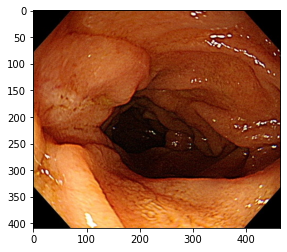

In [360]:
plt.imshow(img3)
img4 = Image.fromarray(img3)
channels = cv2.split(img4)
colors = ('r', 'g', 'b')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 1])
    plt.plot(hist, color = color)
plt.show()

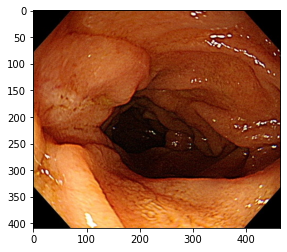

In [362]:
plt.imshow(img3)

### 각 channel에 따라서 normalize

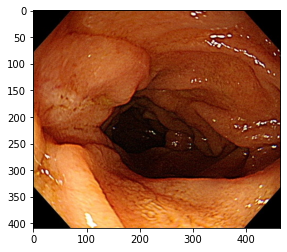

In [341]:
r, g, b = cv2.split(i)

# zeros = np.zeros((i.shape[0],i.shape[1]), dtype = "uint8")
# r = cv2.merge([r,zeros,zeros])
# g = cv2.merge([zeros,g,zeros])
# b = cv2.merge([zeros,zeros,b])

# plt.imshow(b)

b1 = np.array(b, dtype=np.float32)
b2 = (b1 - np.min(b1)) / (np.max(b1)-np.min(b1))


g1 = np.array(g, dtype=np.float32)
g2 = (g1 - np.min(g1)) / (np.max(g1)-np.min(g1))


r1 = np.array(r, dtype=np.float32)
r2 = (r1 - np.min(r1)) / (np.max(r1)-np.min(r1))


merge = cv2.merge((r2,g2,b2))
plt.imshow(merge)



### 원본 이미지의 각 color 분포

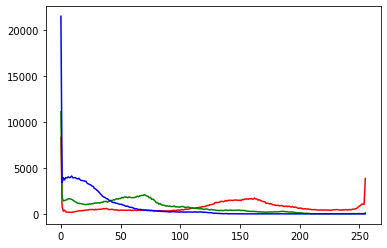

In [344]:
channels = cv2.split(i)
colors = ('r', 'g', 'b')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

### 각 필터에 대해서 normalize 했을 때의 분포

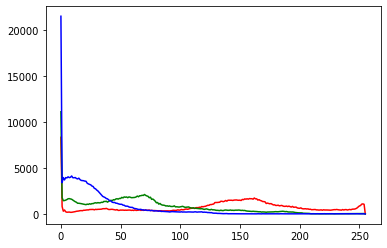

In [346]:
channels = cv2.split(merge)
colors = ('r', 'g', 'b')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 1])
    plt.plot(hist, color = color)
plt.show()